In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('orders_autumn_2020.csv')

In [3]:
df.head()

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
0,2020-08-01 06:07:00.000,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0
1,2020-08-01 06:17:00.000,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0
2,2020-08-01 06:54:00.000,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0
3,2020-08-01 07:09:00.000,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0
4,2020-08-01 07:10:00.000,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head(5)

,timestamp,actual_delivery_minutes - estimated_delivery_minutes,item_count,user_lat,user_long,venue_lat,venue_long,estimated_delivery_minutes,actual_delivery_minutes,cloud_coverage,temperature,wind_speed,precipitation
0,2020-08-01 06:07:00.000,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0
1,2020-08-01 06:17:00.000,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0
2,2020-08-01 06:54:00.000,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0
3,2020-08-01 07:09:00.000,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0
4,2020-08-01 07:10:00.000,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0


In [6]:
 df.rename(columns = {'actual_delivery_minutes - estimated_delivery_minutes' : 'act_est_minutes', 
                      'estimated_delivery_minutes' : 'est_del_min', 
                      'actual_delivery_minutes' : 'act_del_min'}, inplace = True)

In [7]:
df['distance'] = 0

In [8]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians
for i, row in df.iterrows():
    user_in_radians = [radians(_) for _ in [row['user_lat'], row['user_long']]]
    venue_in_radians = [radians(_) for _ in [row['venue_lat'],row['venue_long']]]
    result = haversine_distances([user_in_radians, venue_in_radians])
    df.at[i, 'distance'] = result[0][1] * 6371000/1000

In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['week_day'] = df['timestamp'].dt.weekday

In [10]:
df= pd.get_dummies(df, columns=['week_day'])

In [11]:
df.head(5)

,timestamp,act_est_minutes,item_count,user_lat,user_long,venue_lat,venue_long,est_del_min,act_del_min,cloud_coverage,...,month,day,hour,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6
0,2020-08-01 06:07:00,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,...,8,1,6,0,0,0,0,0,1,0
1,2020-08-01 06:17:00,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,...,8,1,6,0,0,0,0,0,1,0
2,2020-08-01 06:54:00,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,...,8,1,6,0,0,0,0,0,1,0
3,2020-08-01 07:09:00,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,...,8,1,7,0,0,0,0,0,1,0
4,2020-08-01 07:10:00,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,...,8,1,7,0,0,0,0,0,1,0


In [12]:
df['rainy'] = (df['precipitation'] > 0).astype('int32')

In [13]:
df.loc[df['rainy'] == 1]

,timestamp,act_est_minutes,item_count,user_lat,user_long,venue_lat,venue_long,est_del_min,act_del_min,cloud_coverage,...,day,hour,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,rainy
428,2020-08-02 12:01:00,-12,1,60.187,24.946,60.183,24.946,31,19,0.0,...,2,12,0,0,0,0,0,0,1,1
429,2020-08-02 12:02:00,0,4,60.171,24.926,60.179,24.923,38,38,0.0,...,2,12,0,0,0,0,0,0,1,1
430,2020-08-02 12:02:00,19,3,60.160,24.942,60.165,24.936,30,49,0.0,...,2,12,0,0,0,0,0,0,1,1
431,2020-08-02 12:08:00,3,1,60.195,24.958,60.185,24.961,29,32,0.0,...,2,12,0,0,0,0,0,0,1,1
432,2020-08-02 12:08:00,13,4,60.171,24.960,60.167,24.966,30,43,0.0,...,2,12,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14236,2020-09-17 13:47:00,-13,1,60.156,24.948,60.164,24.936,35,22,0.0,...,17,13,0,0,0,1,0,0,0,1
14237,2020-09-17 13:47:00,-8,4,60.187,24.968,60.178,24.949,36,28,0.0,...,17,13,0,0,0,1,0,0,0,1
14238,2020-09-17 13:47:00,2,4,60.178,24.954,60.187,24.956,31,33,0.0,...,17,13,0,0,0,1,0,0,0,1
14239,2020-09-17 13:53:00,-2,1,60.163,24.939,60.172,24.958,39,37,0.0,...,17,13,0,0,0,1,0,0,0,1


In [14]:
df.value_counts('year')

year
2020    18706
dtype: int64

In [15]:
df.value_counts('month')

month
9    9634
8    9072
dtype: int64

In [16]:
df.value_counts('hour', sort = False)

hour
4        3
5       78
6      198
7      610
8     1521
9     1593
10    1487
11    1337
12    1292
13    1580
14    1946
15    2125
16    1912
17    1525
18     918
19     419
20      85
21      72
22       5
dtype: int64

Text(0, 0.5, 'Плотность')

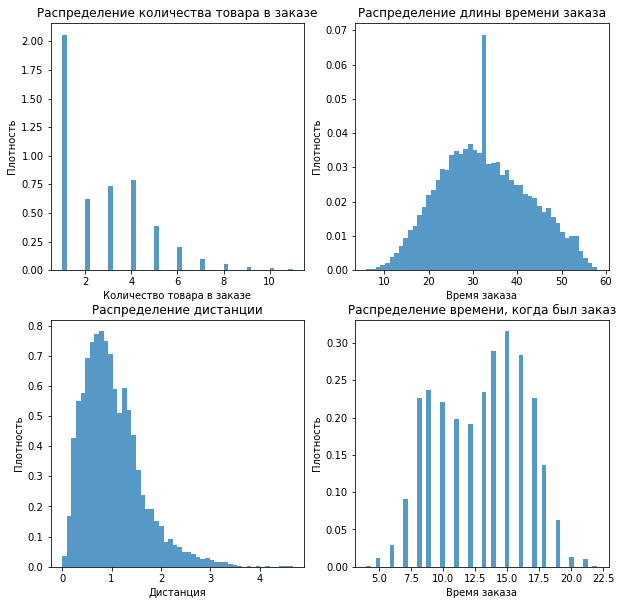

In [17]:
rows, cols = 2, 2
fig, axes = plt.subplots(rows, cols, figsize = (10,10))
axes[0][0].hist(df['item_count'], 50, density = True, alpha=0.75)
axes[0][0].set_title('Распределение количества товара в заказе')
axes[0][0].set_xlabel('Количество товара в заказе')
axes[0][0].set_ylabel('Плотность')

axes[0][1].hist(df['act_del_min'], 50, density = True, alpha=0.75)
axes[0][1].set_title('Распределение длины времени заказа')
axes[0][1].set_xlabel('Время заказа')
axes[0][1].set_ylabel('Плотность')

axes[1][0].hist(df['distance'], 50, density = True, alpha=0.75)
axes[1][0].set_title('Распределение дистанции')
axes[1][0].set_xlabel('Дистанция')
axes[1][0].set_ylabel('Плотность')

axes[1][1].hist(df['hour'], 50, density = True, alpha=0.75)
axes[1][1].set_title('Распределение времени, когда был заказ')
axes[1][1].set_xlabel('Время заказа')
axes[1][1].set_ylabel('Плотность')

Text(0, 0.5, 'Плотность')

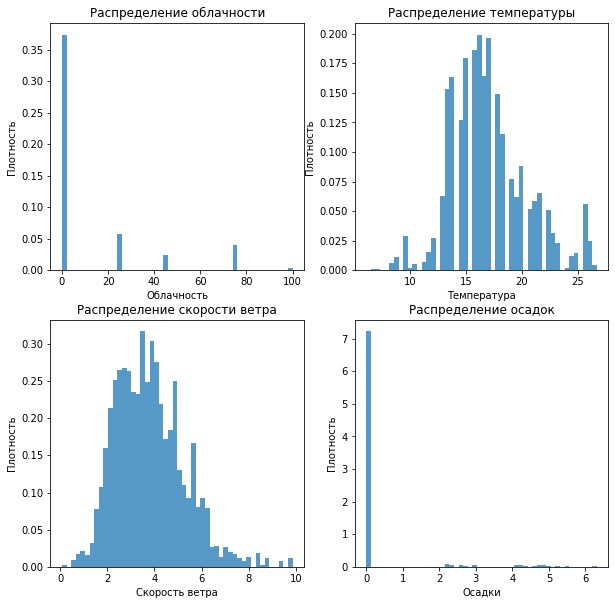

In [18]:
rows, cols = 2, 2
fig, axes = plt.subplots(rows, cols, figsize = (10,10))
axes[0][0].hist(df['cloud_coverage'], 50, density = True, alpha=0.75)
axes[0][0].set_title('Распределение облачности')
axes[0][0].set_xlabel('Облачность')
axes[0][0].set_ylabel('Плотность')

axes[0][1].hist(df['temperature'], 50, density = True, alpha=0.75)
axes[0][1].set_title('Распределение температуры')
axes[0][1].set_xlabel('Температура')
axes[0][1].set_ylabel('Плотность')

axes[1][0].hist(df['wind_speed'], 50, density = True, alpha=0.75)
axes[1][0].set_title('Распределение скорости ветра')
axes[1][0].set_xlabel('Скорость ветра')
axes[1][0].set_ylabel('Плотность')

axes[1][1].hist(df['precipitation'], 50, density = True, alpha=0.75)
axes[1][1].set_title('Распределение осадок')
axes[1][1].set_xlabel('Осадки')
axes[1][1].set_ylabel('Плотность')

In [19]:
#Рассчитаем кол-во проходимой дистанции в минуту, чтобы определить влияние остальных фичей на время в пути, кроме дистанции
df['distance_in_min'] = df.apply(lambda row: row['distance']/row['act_del_min'], axis = 1)

<AxesSubplot:xlabel='temperature', ylabel='distance_in_min'>

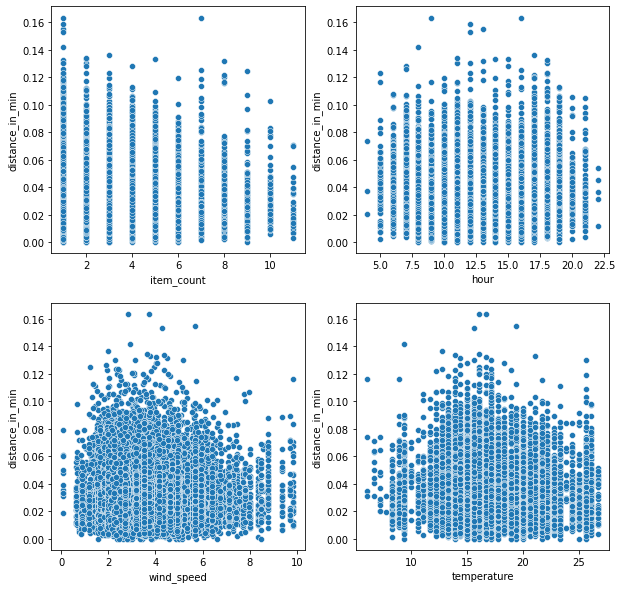

In [20]:
rows, cols = 2, 2
fig, axes = plt.subplots(rows, cols, figsize = (10,10))

sns.scatterplot(data=df, x='item_count', y='distance_in_min', ax=axes[0,0])
sns.scatterplot(data=df, x='hour', y='distance_in_min', ax=axes[0,1])
sns.scatterplot(data=df, x='wind_speed', y='distance_in_min', ax=axes[1,0])
sns.scatterplot(data=df, x='temperature', y='distance_in_min', ax=axes[1,1])

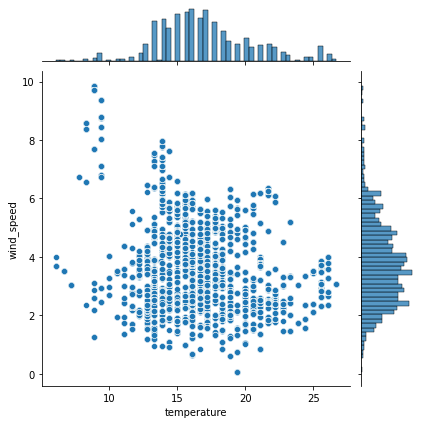

In [21]:
sns.jointplot(data=df, x='temperature', y='wind_speed', ax=axes[1,1])

Text(0, 0.5, 'Плотность')

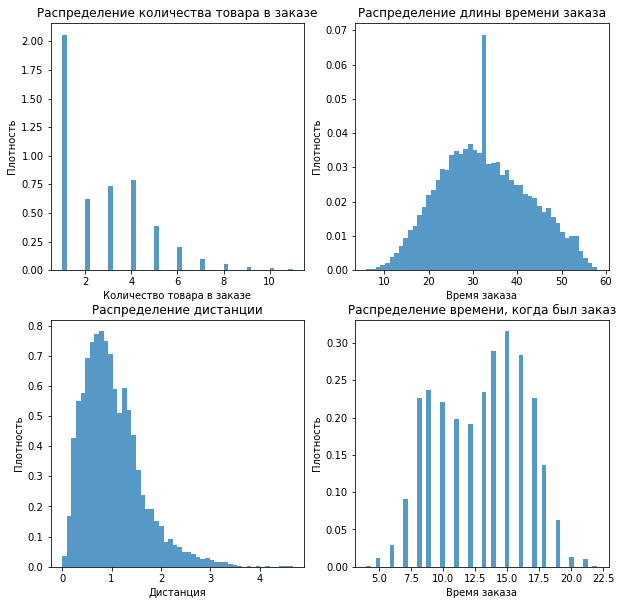

In [22]:
rows, cols = 2, 2
fig, axes = plt.subplots(rows, cols, figsize = (10,10))
axes[0][0].hist(df['item_count'], 50, density = True, alpha=0.75)
axes[0][0].set_title('Распределение количества товара в заказе')
axes[0][0].set_xlabel('Количество товара в заказе')
axes[0][0].set_ylabel('Плотность')

axes[0][1].hist(df['act_del_min'], 50, density = True, alpha=0.75)
axes[0][1].set_title('Распределение длины времени заказа')
axes[0][1].set_xlabel('Время заказа')
axes[0][1].set_ylabel('Плотность')

axes[1][0].hist(df['distance'], 50, density = True, alpha=0.75)
axes[1][0].set_title('Распределение дистанции')
axes[1][0].set_xlabel('Дистанция')
axes[1][0].set_ylabel('Плотность')

axes[1][1].hist(df['hour'], 50, density = True, alpha=0.75)
axes[1][1].set_title('Распределение времени, когда был заказ')
axes[1][1].set_xlabel('Время заказа')
axes[1][1].set_ylabel('Плотность')

In [23]:
df = df.drop(['year','user_lat','user_long','venue_lat','venue_long'], axis=1)

In [24]:
df.describe()

,act_est_minutes,item_count,est_del_min,act_del_min,cloud_coverage,temperature,wind_speed,precipitation,distance,month,...,hour,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,rainy,distance_in_min
count,18706.000000,18706.000000,18706.000000,18706.000000,18429.000000,18429.000000,18429.000000,18706.000000,18706.000000,18706.000000,...,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000
mean,-1.201058,2.688228,33.809313,32.608254,11.996853,16.973536,3.790991,0.332756,1.020658,8.515022,...,12.906501,0.120443,0.122688,0.136160,0.120496,0.146744,0.174757,0.178713,0.087565,0.032807
std,8.979834,1.886455,7.340283,10.018879,23.812605,3.411900,1.456017,1.129234,0.591362,0.499788,...,3.425891,0.325487,0.328087,0.342967,0.325549,0.353860,0.379769,0.383122,0.282669,0.018743
min,-41.000000,1.000000,10.000000,6.000000,0.000000,6.100000,0.077419,0.000000,0.000000,8.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.000000,1.000000,28.000000,25.000000,0.000000,14.400000,2.696190,0.000000,0.589772,8.000000,...,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019215
50%,-2.000000,2.000000,33.000000,32.000000,0.000000,16.700000,3.631970,0.000000,0.909104,9.000000,...,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029476
75%,5.000000,4.000000,38.000000,40.000000,25.000000,18.900000,4.692530,0.000000,1.335486,9.000000,...,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042547
max,34.000000,11.000000,82.000000,58.000000,100.000000,26.700000,9.857300,6.315790,4.662349,9.000000,...,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.163480


In [25]:
df.isnull().sum()

timestamp            0
act_est_minutes      0
item_count           0
est_del_min          0
act_del_min          0
cloud_coverage     277
temperature        277
wind_speed         277
precipitation        0
distance             0
month                0
day                  0
hour                 0
week_day_0           0
week_day_1           0
week_day_2           0
week_day_3           0
week_day_4           0
week_day_5           0
week_day_6           0
rainy                0
distance_in_min      0
dtype: int64

In [26]:
# weather = df.groupby(['month','day','hour']).agg({'cloud_coverage': 'mean', 'temperature': 'mean', 'wind_speed': 'mean'})

In [27]:
#weather_nulls = df.groupby(['month','day']).agg({'cloud_coverage': 'mean', 'temperature': 'mean', 'wind_speed': 'mean'})

In [28]:
#weather_nulls.isnull().sum()

In [29]:
#df = df.merge(weather_nulls, on=['month','day'], how='left')
#df.loc[df['temperature'].isna(),'temperature'] = df2['TEMPERATURE'].mean()
#df.loc[df['wind_speed'].isna(),'wind_speed'] = df2['WIND_SPEED'].mean()

In [30]:
#df['cloud_coverage_z'] = df.apply(lambda x: x.cloud_coverage_x if pd.isnull(x.cloud_coverage_x) else x.cloud_coverage_y, axis=1)

In [31]:
#2020-09-10
df.loc[df['wind_speed'].isna()]

,timestamp,act_est_minutes,item_count,est_del_min,act_del_min,cloud_coverage,temperature,wind_speed,precipitation,distance,...,hour,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,rainy,distance_in_min
11778,2020-09-10 06:22:00,-1,2,21,20,NaN,NaN,NaN,0.0,0.444780,...,6,0,0,0,1,0,0,0,0,0.022239
11779,2020-09-10 06:29:00,4,1,22,26,NaN,NaN,NaN,0.0,0.433367,...,6,0,0,0,1,0,0,0,0,0.016668
11780,2020-09-10 06:31:00,1,2,25,26,NaN,NaN,NaN,0.0,0.941168,...,6,0,0,0,1,0,0,0,0,0.036199
11781,2020-09-10 06:38:00,-7,2,23,16,NaN,NaN,NaN,0.0,0.869373,...,6,0,0,0,1,0,0,0,0,0.054336
11782,2020-09-10 07:00:00,7,2,30,37,NaN,NaN,NaN,0.0,0.970149,...,7,0,0,0,1,0,0,0,0,0.026220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12050,2020-09-10 18:56:00,-10,4,34,24,NaN,NaN,NaN,0.0,0.771348,...,18,0,0,0,1,0,0,0,0,0.032140
12051,2020-09-10 19:07:00,4,1,23,27,NaN,NaN,NaN,0.0,1.113324,...,19,0,0,0,1,0,0,0,0,0.041234
12052,2020-09-10 19:09:00,11,6,23,34,NaN,NaN,NaN,0.0,1.338919,...,19,0,0,0,1,0,0,0,0,0.039380
12053,2020-09-10 19:43:00,-7,2,26,19,NaN,NaN,NaN,0.0,0.904909,...,19,0,0,0,1,0,0,0,0,0.047627


In [32]:
#Проверяем предыдущий день, чтобы взять значения для NA
df.loc[(df['day']==9) & (df['month']==9)]

,timestamp,act_est_minutes,item_count,est_del_min,act_del_min,cloud_coverage,temperature,wind_speed,precipitation,distance,...,hour,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,rainy,distance_in_min
11466,2020-09-09 05:13:00,4,1,38,42,0.0,11.7,1.69769,0.00000,2.496409,...,5,0,0,1,0,0,0,0,0,0.059438
11467,2020-09-09 05:28:00,-10,9,32,22,0.0,11.7,1.69769,0.00000,1.244085,...,5,0,0,1,0,0,0,0,0,0.056549
11468,2020-09-09 05:47:00,12,7,23,35,0.0,11.7,1.69769,0.00000,0.497925,...,5,0,0,1,0,0,0,0,0,0.014226
11469,2020-09-09 05:58:00,-4,1,24,20,0.0,11.7,1.69769,0.00000,1.196743,...,5,0,0,1,0,0,0,0,0,0.059837
11470,2020-09-09 06:27:00,10,3,40,50,0.0,13.3,1.54193,0.00000,3.255194,...,6,0,0,1,0,0,0,0,0,0.065104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11773,2020-09-09 19:01:00,-2,5,19,17,0.0,15.2,4.78705,5.05263,0.351449,...,19,0,0,1,0,0,0,0,1,0.020673
11774,2020-09-09 19:06:00,-10,4,34,24,0.0,15.2,4.78705,5.05263,0.165934,...,19,0,0,1,0,0,0,0,1,0.006914
11775,2020-09-09 19:19:00,-5,2,24,19,0.0,15.2,4.78705,5.05263,0.553216,...,19,0,0,1,0,0,0,0,1,0.029117
11776,2020-09-09 19:30:00,4,4,29,33,0.0,15.2,4.78705,5.05263,1.320453,...,19,0,0,1,0,0,0,0,1,0.040014


<AxesSubplot:xlabel='timestamp', ylabel='temperature'>

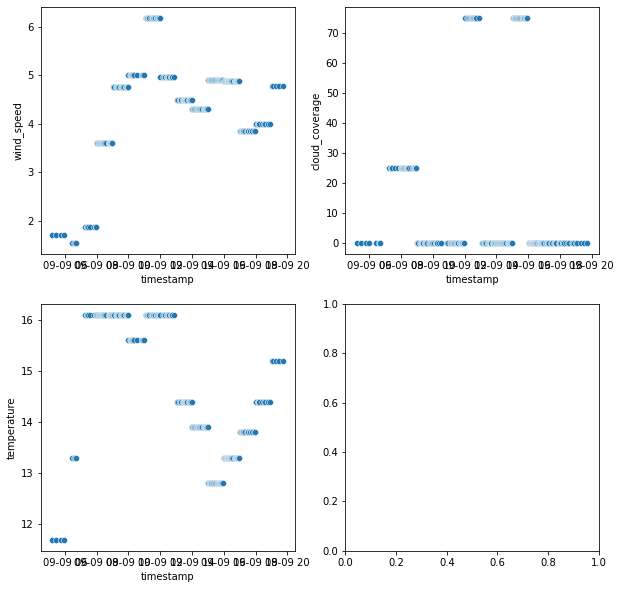

In [33]:
#Проверяем визуально на графике предыдущий день
rows, cols = 2,2
fig, axes = plt.subplots(rows, cols, figsize = (10,10))

sns.scatterplot(data=df.loc[(df['day']==9) & (df['month']==9)], x='timestamp', y='wind_speed', ax=axes[0,0])
sns.scatterplot(data=df.loc[(df['day']==9) & (df['month']==9)], x='timestamp', y='cloud_coverage', ax=axes[0,1])
sns.scatterplot(data=df.loc[(df['day']==9) & (df['month']==9)], x='timestamp', y='temperature', ax=axes[1,0])

In [34]:
wind_speed_yesterday= df.loc[(df['day']==9) & (df['month']==9), 'wind_speed'].mean()
temperature_yesterday=df.loc[(df['day']==9) & (df['month']==9), 'temperature'].mean()
cloud_coverage_yesterday=df.loc[(df['day']==9) & (df['month']==9), 'cloud_coverage'].mean()

In [35]:
df.loc[df['wind_speed'].isna(), 'wind_speed'] = wind_speed_yesterday
df.loc[df['temperature'].isna(), 'temperature'] = temperature_yesterday
df.loc[df['cloud_coverage'].isna(), 'cloud_coverage'] = cloud_coverage_yesterday

In [36]:
df.isna().sum()

timestamp          0
act_est_minutes    0
item_count         0
est_del_min        0
act_del_min        0
cloud_coverage     0
temperature        0
wind_speed         0
precipitation      0
distance           0
month              0
day                0
hour               0
week_day_0         0
week_day_1         0
week_day_2         0
week_day_3         0
week_day_4         0
week_day_5         0
week_day_6         0
rainy              0
distance_in_min    0
dtype: int64

In [37]:
corelation = df.corr(method = 'spearman')

<AxesSubplot:>

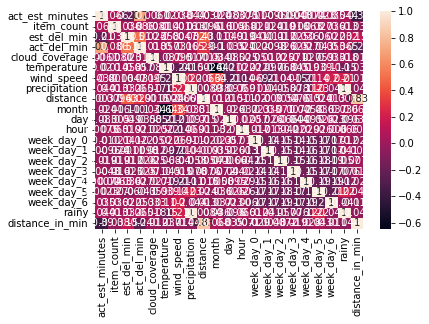

In [38]:
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

In [39]:
df.head(5)

,timestamp,act_est_minutes,item_count,est_del_min,act_del_min,cloud_coverage,temperature,wind_speed,precipitation,distance,...,hour,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,rainy,distance_in_min
0,2020-08-01 06:07:00,-19,1,29,10,0.0,15.0,3.53644,0.0,0.222390,...,6,0,0,0,0,0,1,0,0,0.022239
1,2020-08-01 06:17:00,-7,8,39,32,0.0,15.0,3.53644,0.0,1.456445,...,6,0,0,0,0,0,1,0,0,0.045514
2,2020-08-01 06:54:00,-17,4,23,6,0.0,15.0,3.53644,0.0,0.156870,...,6,0,0,0,0,0,1,0,0,0.026145
3,2020-08-01 07:09:00,-2,3,28,26,0.0,16.7,3.52267,0.0,2.441279,...,7,0,0,0,0,0,1,0,0,0.093895
4,2020-08-01 07:10:00,-1,2,27,26,0.0,16.7,3.52267,0.0,0.554886,...,7,0,0,0,0,0,1,0,0,0.021342


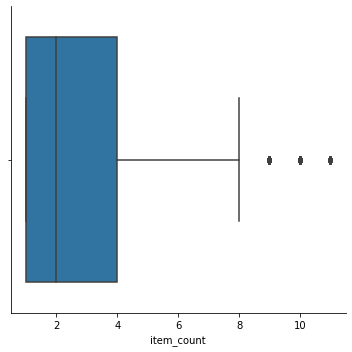

In [40]:
sns.catplot(data=df, x = 'item_count',  kind = 'box')

In [41]:
(df.item_count > 8).sum()

195

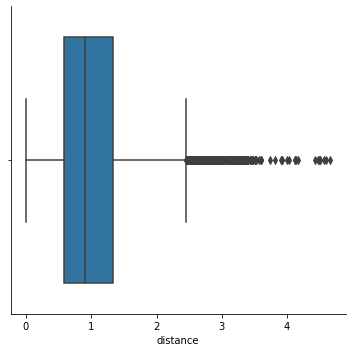

In [42]:
sns.catplot(x = 'distance', kind = 'box', data = df)

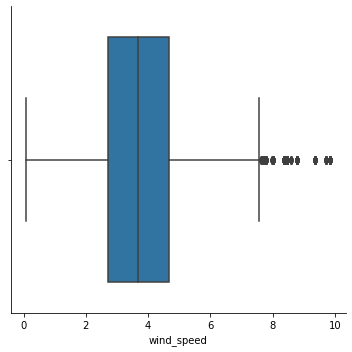

In [43]:
sns.catplot(x = 'wind_speed', kind = 'box', data = df)

In [44]:
(df.wind_speed > 7).sum()

507

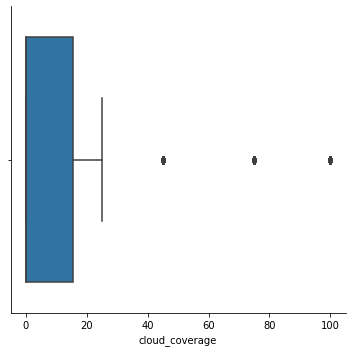

In [45]:
sns.catplot(x = 'cloud_coverage', kind = 'box', data = df)

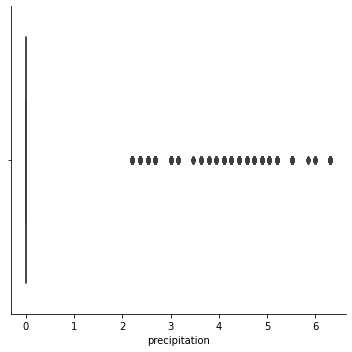

In [46]:
sns.catplot(x = 'precipitation', kind = 'box', data = df)

In [47]:
(df.precipitation > 5).sum()

258

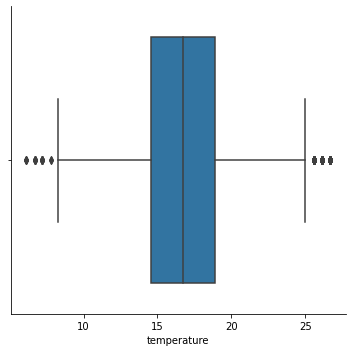

In [48]:
sns.catplot(x = 'temperature', kind = 'box', data = df)

In [49]:
Q1 =  df['cloud_coverage'].quantile(0.25)
Q3 = df['cloud_coverage'].quantile(0.75)
IQR = Q3 - Q1
df.loc[df['cloud_coverage'] < Q1-2.5*IQR, 'cloud_coverage'] = Q1-2.5*IQR
df.loc[df['cloud_coverage'] > Q3+2.5*IQR, 'cloud_coverage'] = Q3+2.5*IQR

In [50]:
Q1 =  df['temperature'].quantile(0.25)
Q3 = df['temperature'].quantile(0.75)
IQR = Q3 - Q1
df.loc[df['temperature'] < Q1-1.75*IQR, 'temperature'] = Q1-1.75*IQR
df.loc[df['temperature'] > Q3+1.75*IQR, 'temperature'] = Q3+1.75*IQR

In [51]:
Q1 =  df['wind_speed'].quantile(0.25)
Q3 = df['wind_speed'].quantile(0.75)
IQR = Q3 - Q1
df.loc[df['wind_speed'] < Q1-1.75*IQR, 'wind_speed'] = Q1-1.75*IQR
df.loc[df['wind_speed'] > Q3+1.75*IQR, 'wind_speed'] = Q3+1.75*IQR

In [52]:
Q1 =  df['item_count'].quantile(0.25)
Q3 = df['item_count'].quantile(0.75)
IQR = Q3 - Q1
df.loc[df['item_count'] < Q1-1.75*IQR, 'item_count'] = Q1-1.75*IQR
df.loc[df['item_count'] > Q3+1.75*IQR, 'item_count'] = Q3+1.75*IQR

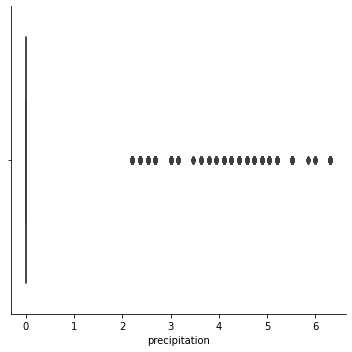

In [53]:
sns.catplot(x = 'precipitation', kind = 'box', data = df)

In [54]:
df.head(5)

,timestamp,act_est_minutes,item_count,est_del_min,act_del_min,cloud_coverage,temperature,wind_speed,precipitation,distance,...,hour,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,rainy,distance_in_min
0,2020-08-01 06:07:00,-19,1.0,29,10,0.0,15.0,3.53644,0.0,0.222390,...,6,0,0,0,0,0,1,0,0,0.022239
1,2020-08-01 06:17:00,-7,8.0,39,32,0.0,15.0,3.53644,0.0,1.456445,...,6,0,0,0,0,0,1,0,0,0.045514
2,2020-08-01 06:54:00,-17,4.0,23,6,0.0,15.0,3.53644,0.0,0.156870,...,6,0,0,0,0,0,1,0,0,0.026145
3,2020-08-01 07:09:00,-2,3.0,28,26,0.0,16.7,3.52267,0.0,2.441279,...,7,0,0,0,0,0,1,0,0,0.093895
4,2020-08-01 07:10:00,-1,2.0,27,26,0.0,16.7,3.52267,0.0,0.554886,...,7,0,0,0,0,0,1,0,0,0.021342


In [55]:
X = df.drop(['timestamp','act_est_minutes','est_del_min','act_del_min','month','day','distance_in_min'], axis=1)
y = df['act_del_min']

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.20, shuffle = True, random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape
from sklearn.preprocessing import StandardScaler
# clf = SGDRegressor()
# parametrs = { 'tol': np.arange (0.00001, 0.1),
#               'eta0': np.arange (0.00001, 0.1)
#             }
# grid = GridSearchCV(clf, parametrs, cv=5)
# grid.fit(X_test,y_test)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
# print("\n The best score across ALL searched params:\n",grid.best_score_)
# print("\n The best parameters across ALL searched params:\n",grid.best_params_)

In [58]:
# clf2 = SGDRegressor(**grid.best_params_)
# model = clf2.fit(X_test,y_test)

In [59]:
y_predict = model.predict(X_test)

In [60]:
mae(y_test, y_predict)

7.75784400770362

In [61]:
mape(y_test, y_predict)

0.28444980013172977

In [62]:
mape(df.act_del_min, df.est_del_min)

0.2599804544227312

In [63]:
#baseline_guess = np.median(y_train)

In [64]:
# print('The baseline guess is a score of %0.2f' % baseline_guess)
# print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

In [74]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
parametrs = { 'n_estimators': np.arange (99, 100),
               'max_depth': np.arange (9, 10)
             }
grid = GridSearchCV(model2, parametrs, cv=5, verbose=10, n_jobs=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=9, n_estimators=99................................
[CV 1/5; 1/1] END .max_depth=9, n_estimators=99;, score=0.179 total time=  44.6s
[CV 2/5; 1/1] START max_depth=9, n_estimators=99................................
[CV 2/5; 1/1] END .max_depth=9, n_estimators=99;, score=0.188 total time=  49.2s
[CV 3/5; 1/1] START max_depth=9, n_estimators=99................................
[CV 3/5; 1/1] END .max_depth=9, n_estimators=99;, score=0.214 total time= 1.0min
[CV 4/5; 1/1] START max_depth=9, n_estimators=99................................
[CV 4/5; 1/1] END .max_depth=9, n_estimators=99;, score=0.212 total time=  55.8s
[CV 5/5; 1/1] START max_depth=9, n_estimators=99................................
[CV 5/5; 1/1] END .max_depth=9, n_estimators=99;, score=0.188 total time=  59.6s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': array([9]), 'n_estimators': array([99])},
             verbose=10)

In [75]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=9, n_estimators=99)

 The best score across ALL searched params:
 0.1963415526757889

 The best parameters across ALL searched params:
 {'max_depth': 9, 'n_estimators': 99}


In [79]:
bestmodel = RandomForestRegressor(**grid.best_params_)
bestmodelfit = bestmodel.fit(X_train,y_train)

In [80]:
y_predict2 = bestmodelfit.predict(X_test)

In [81]:
mae(y_test, y_predict2)

7.324565333762927

In [82]:
mape(y_test, y_predict2)

0.2657706014110842